# EDA 프로젝트

## Introduction
이 데이터는 패스트 캠퍼스에서 작년 2021년 3월 부터 9월 까지 강의 판매에 대한 매출 기록표이다. 

# 문제정의

변수(열) = 카테고리 제목에서 데이터 사이언스 과목이라서 제일 많이 팔릴거 같다. 이유는 현재 인공지능과 빅데이터 대한 관심과 이슈가 크기 때문에 이 두 종류의 과목들이 많이 팔렸을것이라 추측으로 시작.
그래서 강의가 팔린개수와 금액 둘다 따진다.

만약 왜 그렇게 팔렸는지에 대한 분석은 강의판매시점, 고객나이, 고객 성별, 금액의 차이, 온라인 강의의 기획 종류, 지역, 홍보된 시기, 판매된 시기

### 목차

1. Load and Check Data

2. 데이터 전처리

2. Variable Description
     - Univariate Variable Analysis
         -- Categorical Variable
         -- Numerical Variable


3. Basic Data Analysis


4. Outlier Detection


5. Missing Value
     - Find Missing Value
     - Fill Missing Value


6. Visualization


In [2]:
import numpy as np # 선형대수 계산 이용
import pandas as pd # 데이터 처리, 엑셀파일 임출력 (e.g. pd.read_csv)

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns


import warnings
warnings.filterwarnings("ignore")




# 1. Load and Check Data



In [3]:
fastcampus = pd.read_excel("C:/Users/user/Documents/EDA 프로젝트/fast.xlsx")

print(fastcampus)

             id  customer_id  course_id     type      state  \
0        970634     504760.0   201435.0    ORDER  CANCELLED   
1        970650     432862.0   203178.0    ORDER  CANCELLED   
2        970657      72297.0   204246.0  PAYMENT  COMPLETED   
3        970656      72297.0   204246.0    ORDER  CANCELLED   
4        970658     478028.0   201797.0  PAYMENT  COMPLETED   
...         ...          ...        ...      ...        ...   
105414  1364995     640697.0   205365.0  PAYMENT  CANCELLED   
105415  1364998     670896.0   204159.0  PAYMENT  CANCELLED   
105416  1364996     640697.0   205365.0  PAYMENT  COMPLETED   
105417  1365005     670896.0   204159.0  PAYMENT  CANCELLED   
105418  1365007     610626.0   206720.0  PAYMENT  COMPLETED   

                           course_title category_title  format  \
0             올인원 패키지 : 알고리즘 기술면접 완전 정복          프로그래밍     올인원   
1           초격차 패키지 : 한번에 끝내는 영상 촬영과 편집          영상/3D     올인원   
2                  시크릿코드 : 프론트엔드 실무 완성편      

In [9]:
fastcampus.columns  # 컬럼 정보 알기

Index(['id', 'customer_id', 'course_id', 'type', 'state', 'course_title',
       'category_title', 'format', 'completed_at', 'transaction_amount',
       'coupon_title', 'coupon_discount_amount', 'sale_price',
       'tax_free_amount', 'pg', 'method', 'subcategory_title',
       'marketing_start_at'],
      dtype='object')

In [10]:
fastcampus.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14


In [11]:
fastcampus.tail()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
105414,1364995,640697.0,205365.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105418,1365007,610626.0,206720.0,PAYMENT,COMPLETED,용호수의 돈 버는 실전 영상 제작,영상/3D,올인원,2021-09-25 14:25:47,139000,[WELCOME] 온라인 강의 3만원 할인쿠폰,30000.0,169000.0,169000.0,NAVER,POINT,영상 편집,2021-08-17


In [12]:
fastcampus.shape # 행의개수, 열의 개수

(105419, 18)

In [13]:
fastcampus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105419 entries, 0 to 105418
Data columns (total 18 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   id                      105419 non-null  int64         
 1   customer_id             105416 non-null  float64       
 2   course_id               100212 non-null  float64       
 3   type                    105419 non-null  object        
 4   state                   105419 non-null  object        
 5   course_title            105403 non-null  object        
 6   category_title          105395 non-null  object        
 7   format                  105403 non-null  object        
 8   completed_at            105419 non-null  datetime64[ns]
 9   transaction_amount      105419 non-null  int64         
 10  coupon_title            31817 non-null   object        
 11  coupon_discount_amount  31817 non-null   float64       
 12  sale_price              104291

### 변수 설명
1. 
2.


## 데이터 전처리

In [14]:
fastcampus.isnull()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,True
1,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
105415,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
105416,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
105417,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False


In [5]:
fastcampus.isnull().sum()

id                            0
customer_id                   3
course_id                  5207
type                          0
state                         0
course_title                 16
category_title               24
format                       16
completed_at                  0
transaction_amount            0
coupon_title              73602
coupon_discount_amount    73602
sale_price                 1128
tax_free_amount            1128
pg                        15075
method                    13096
subcategory_title         19829
marketing_start_at        17979
dtype: int64

In [16]:
# 누락데이터에 대한 정리

missing_df = fastcampus.isnull()

for col in missing_df.columns:
    missing_count = missing_df[col].value_counts()
    try:
        print(col, ': ', missing_count[True])
    except:
        print(col, ': ', 0)

id :  0
customer_id :  3
course_id :  5207
type :  0
state :  0
course_title :  16
category_title :  24
format :  16
completed_at :  0
transaction_amount :  0
coupon_title :  73602
coupon_discount_amount :  73602
sale_price :  1128
tax_free_amount :  1128
pg :  15075
method :  13096
subcategory_title :  19829
marketing_start_at :  17979


In [4]:
fastcampus_copy = fastcampus.copy()

fastcampus_copy

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,tax_free_amount,pg,method,subcategory_title,marketing_start_at
0,970634,504760.0,201435.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,NaN,NaN,110500.0,110500.0,NaN,VBANK,개발자 커리어,NaT
1,970650,432862.0,203178.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,NaN,NaN,116000.0,116000.0,NaN,CARD,영상 편집,2020-12-02
2,970657,72297.0,204246.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
3,970656,72297.0,204246.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,NaN,NaN,190900.0,190900.0,NaN,CARD,NaN,2021-03-04
4,970658,478028.0,201797.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,117500.0,NaN,CARD,PPT/보고서,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697.0,205365.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,TRANS,영상 편집,2021-06-15
105415,1364998,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10
105416,1364996,640697.0,205365.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,116000.0,INICIS,VBANK,영상 편집,2021-06-15
105417,1365005,670896.0,204159.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,NaN,NaN,189000.0,189000.0,INICIS,CARD,부동산 개발,2021-02-10


In [105]:
id(fastcampus_copy)
# id(fastcampus)

1530086577776

In [106]:
col_dup = fastcampus_copy['customer_id'].duplicated().sum()
col_dup  # 중복된거를 넣어서 데이터 분석을 할지 고민된다. 그냥 중복된것도 하나의 고객으로 인정해서 생각해보자.

51665

In [107]:
col_dup2 = fastcampus_copy['id'].duplicated().sum()  # id 값을 다시 인덱스로 다시 변경하기 위해서
col_dup2

0

In [5]:
fastcampus_copy = fastcampus_copy.drop(['course_id', 'tax_free_amount', 'pg', 'method'], axis=1) # 분석에 필요없는 변수는 제거

## 결측치 처리

In [7]:
fastcampus_copy['coupon_title'] = fastcampus_copy['coupon_title'].fillna('없음')
fastcampus_copy['coupon_discount_amount'] = fastcampus_copy['coupon_discount_amount'].fillna(0)  
fastcampus_copy['subcategory_title'] = fastcampus_copy['subcategory_title'].fillna('없음')
fastcampus_copy

# 쿠폰할인 금액을 실수에서 정수로 바꾸는 방법은??

,id,customer_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,subcategory_title,marketing_start_at
0,970634,504760.0,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,없음,0.0,110500.0,개발자 커리어,NaT
1,970650,432862.0,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,없음,0.0,116000.0,영상 편집,2020-12-02
2,970657,72297.0,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090.0,190900.0,없음,2021-03-04
3,970656,72297.0,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,없음,0.0,190900.0,없음,2021-03-04
4,970658,478028.0,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000.0,117500.0,PPT/보고서,2019-11-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105414,1364995,640697.0,PAYMENT,CANCELLED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:10:42,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,영상 편집,2021-06-15
105415,1364998,670896.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:16:33,189000,없음,0.0,189000.0,부동산 개발,2021-02-10
105416,1364996,640697.0,PAYMENT,COMPLETED,초격차 패키지 : 한 번에 끝내는 유튜브 크리에이터 되기,영상/3D,올인원,2021-09-25 14:17:41,96000,[WELCOME] 온라인 강의 2만원 할인쿠폰,20000.0,116000.0,영상 편집,2021-06-15
105417,1365005,670896.0,PAYMENT,CANCELLED,부동산 디벨로퍼 아카데미 : 인허가,부동산/금융,올인원,2021-09-25 14:19:56,189000,없음,0.0,189000.0,부동산 개발,2021-02-10


## 범주형 변수 분석

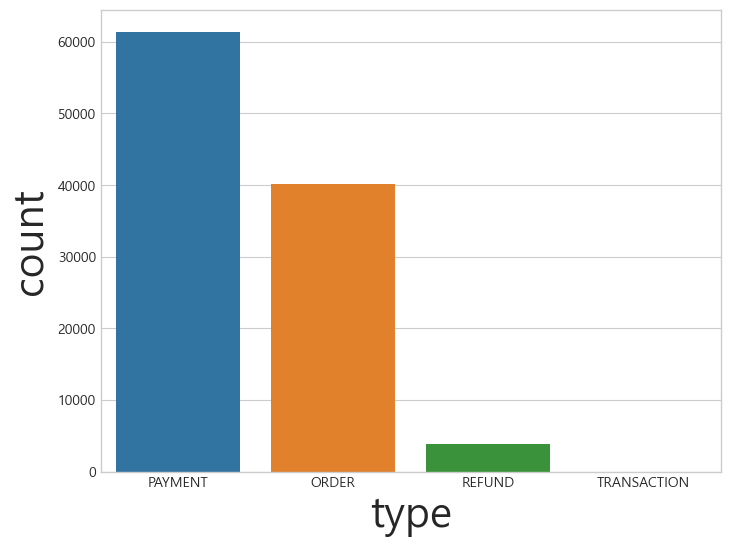

PAYMENT        61433
ORDER          40159
REFUND          3824
TRANSACTION        3
Name: type, dtype: int64


In [46]:
plt.figure(figsize=(8,6))
sns.countplot(x='type', data=fastcampus_copy, order = fastcampus['type'].value_counts().index)
plt.show()
# plt.tight_layout()
plt.rc('axes', labelsize=15)
print(fastcampus_copy['type'].value_counts())

## Type 

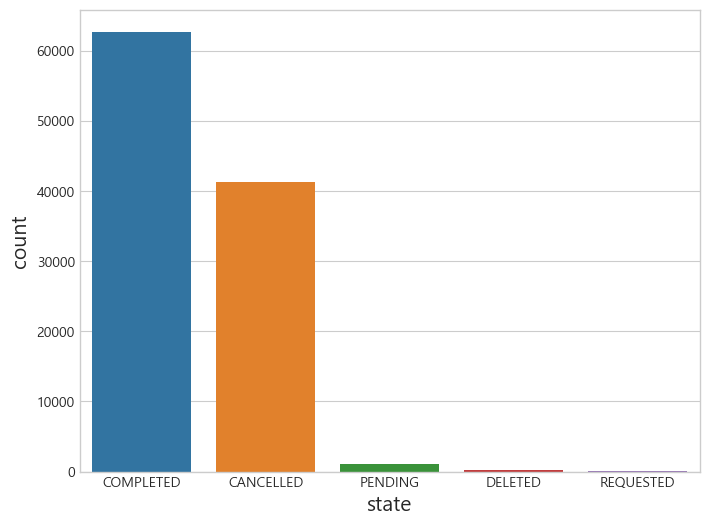

COMPLETED    62763
CANCELLED    41279
PENDING       1144
DELETED        219
REQUESTED       14
Name: state, dtype: int64


In [47]:
plt.figure(figsize=(8,6))
sns.countplot(x='state', data=fastcampus_copy, order = fastcampus['state'].value_counts().index)
plt.show()
# plt.tight_layout()
plt.rc('axes', labelsize=30)
print(fastcampus_copy['state'].value_counts())

## category_title

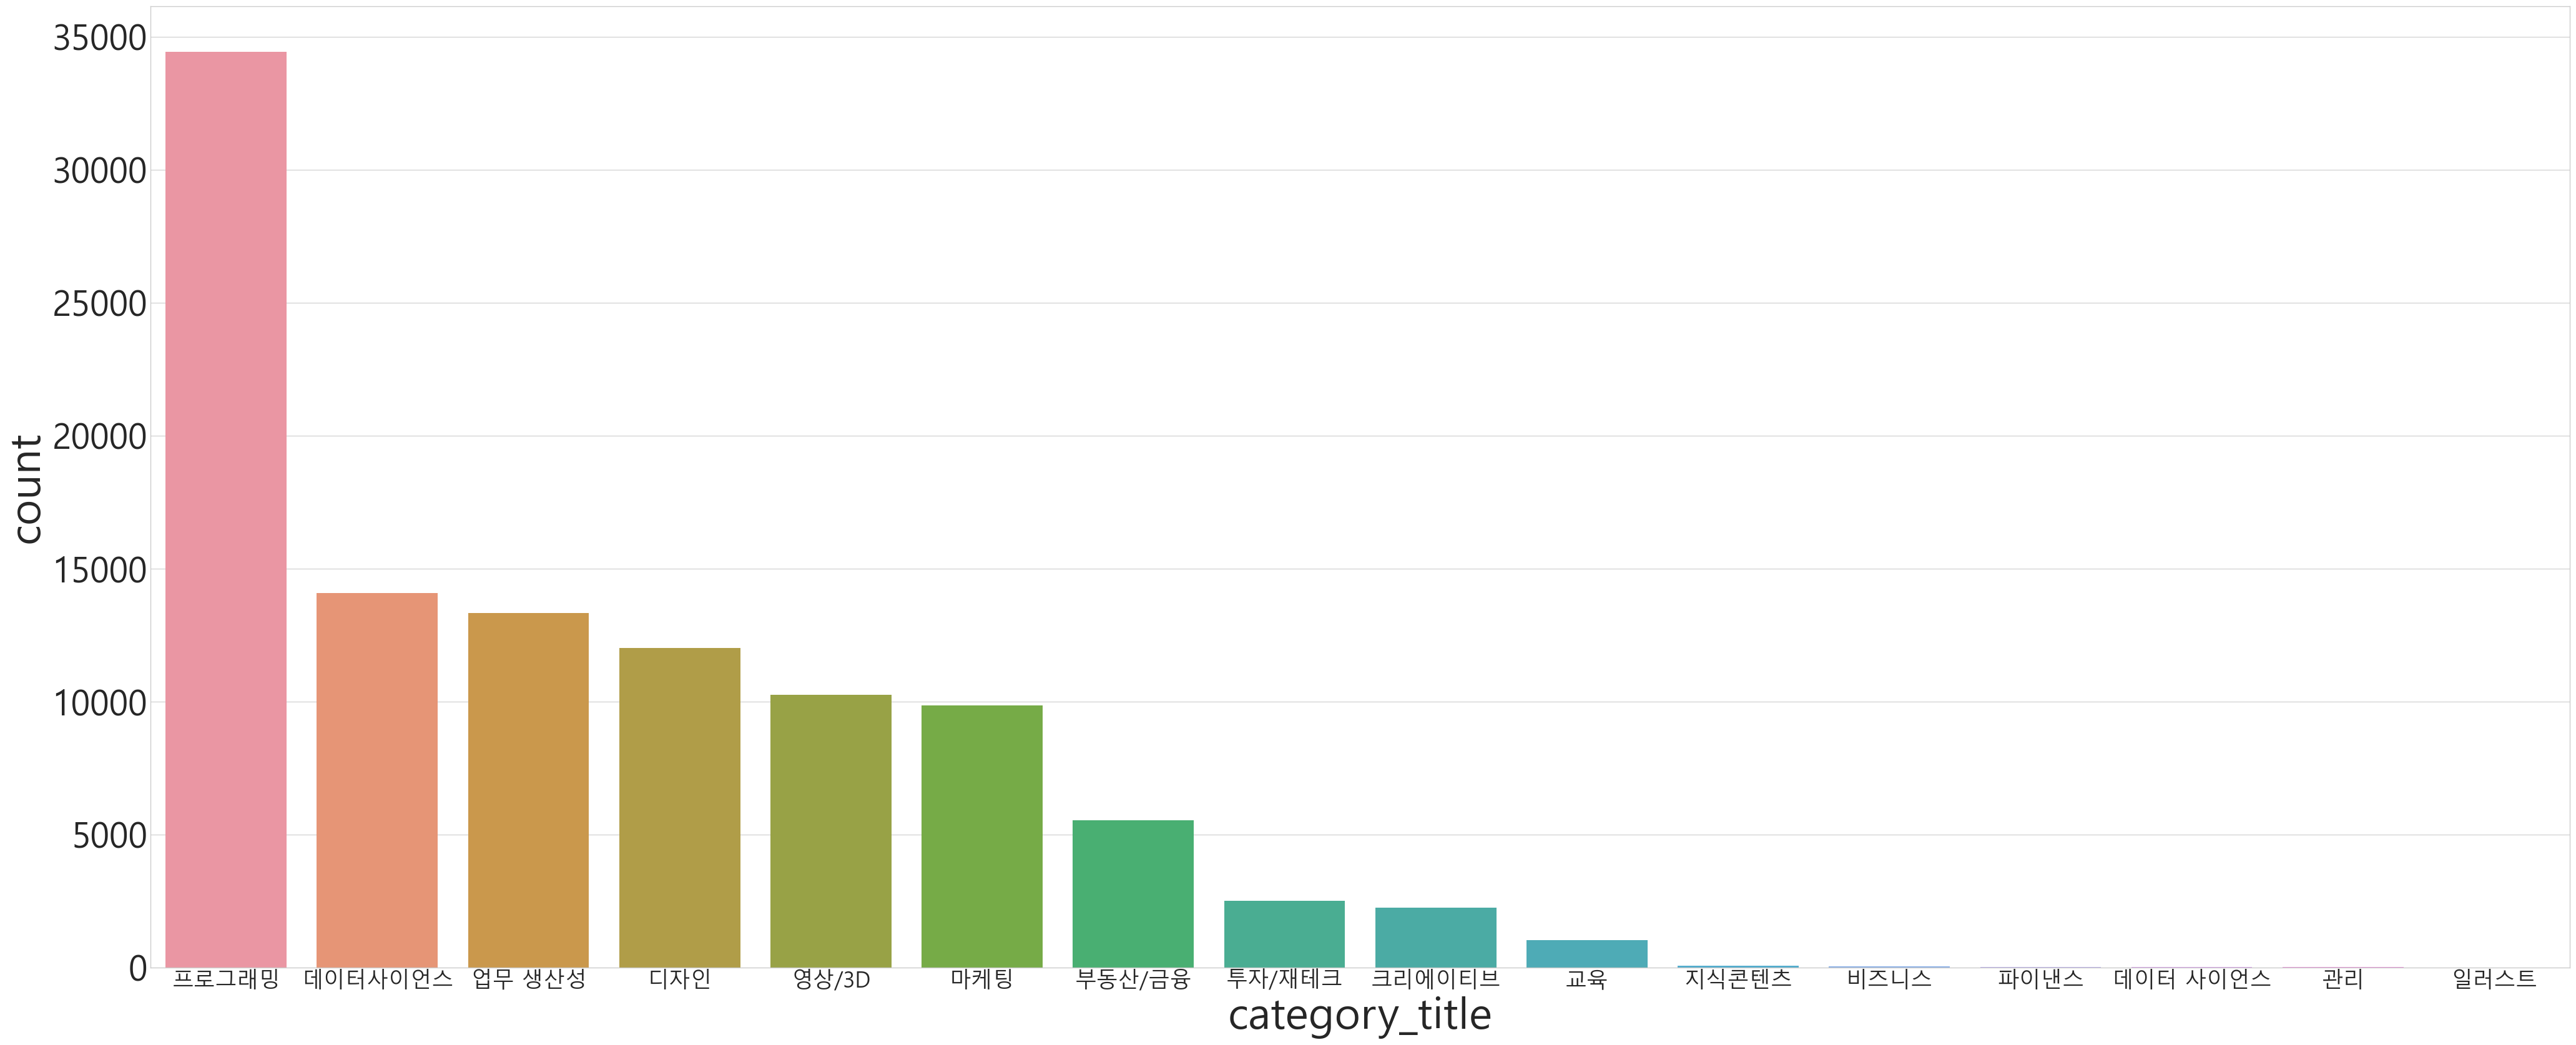

프로그래밍       34430
데이터사이언스     14076
업무 생산성      13323
디자인         12009
영상/3D       10260
마케팅          9857
부동산/금융       5523
투자/재테크       2501
크리에이티브       2250
교육           1031
지식콘텐츠          56
비즈니스           42
파이낸스           25
데이터 사이언스        9
관리              2
일러스트            1
Name: category_title, dtype: int64


In [95]:
plt.figure(figsize=(50,20))
sns.countplot(x='category_title', data=fastcampus_copy, order = fastcampus['category_title'].value_counts().index, )
plt.show()
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('axes', labelsize=50)
plt.rc('xtick', labelsize=22)
plt.rc('ytick', labelsize=40)
print(fastcampus_copy['category_title'].value_counts())

## Format

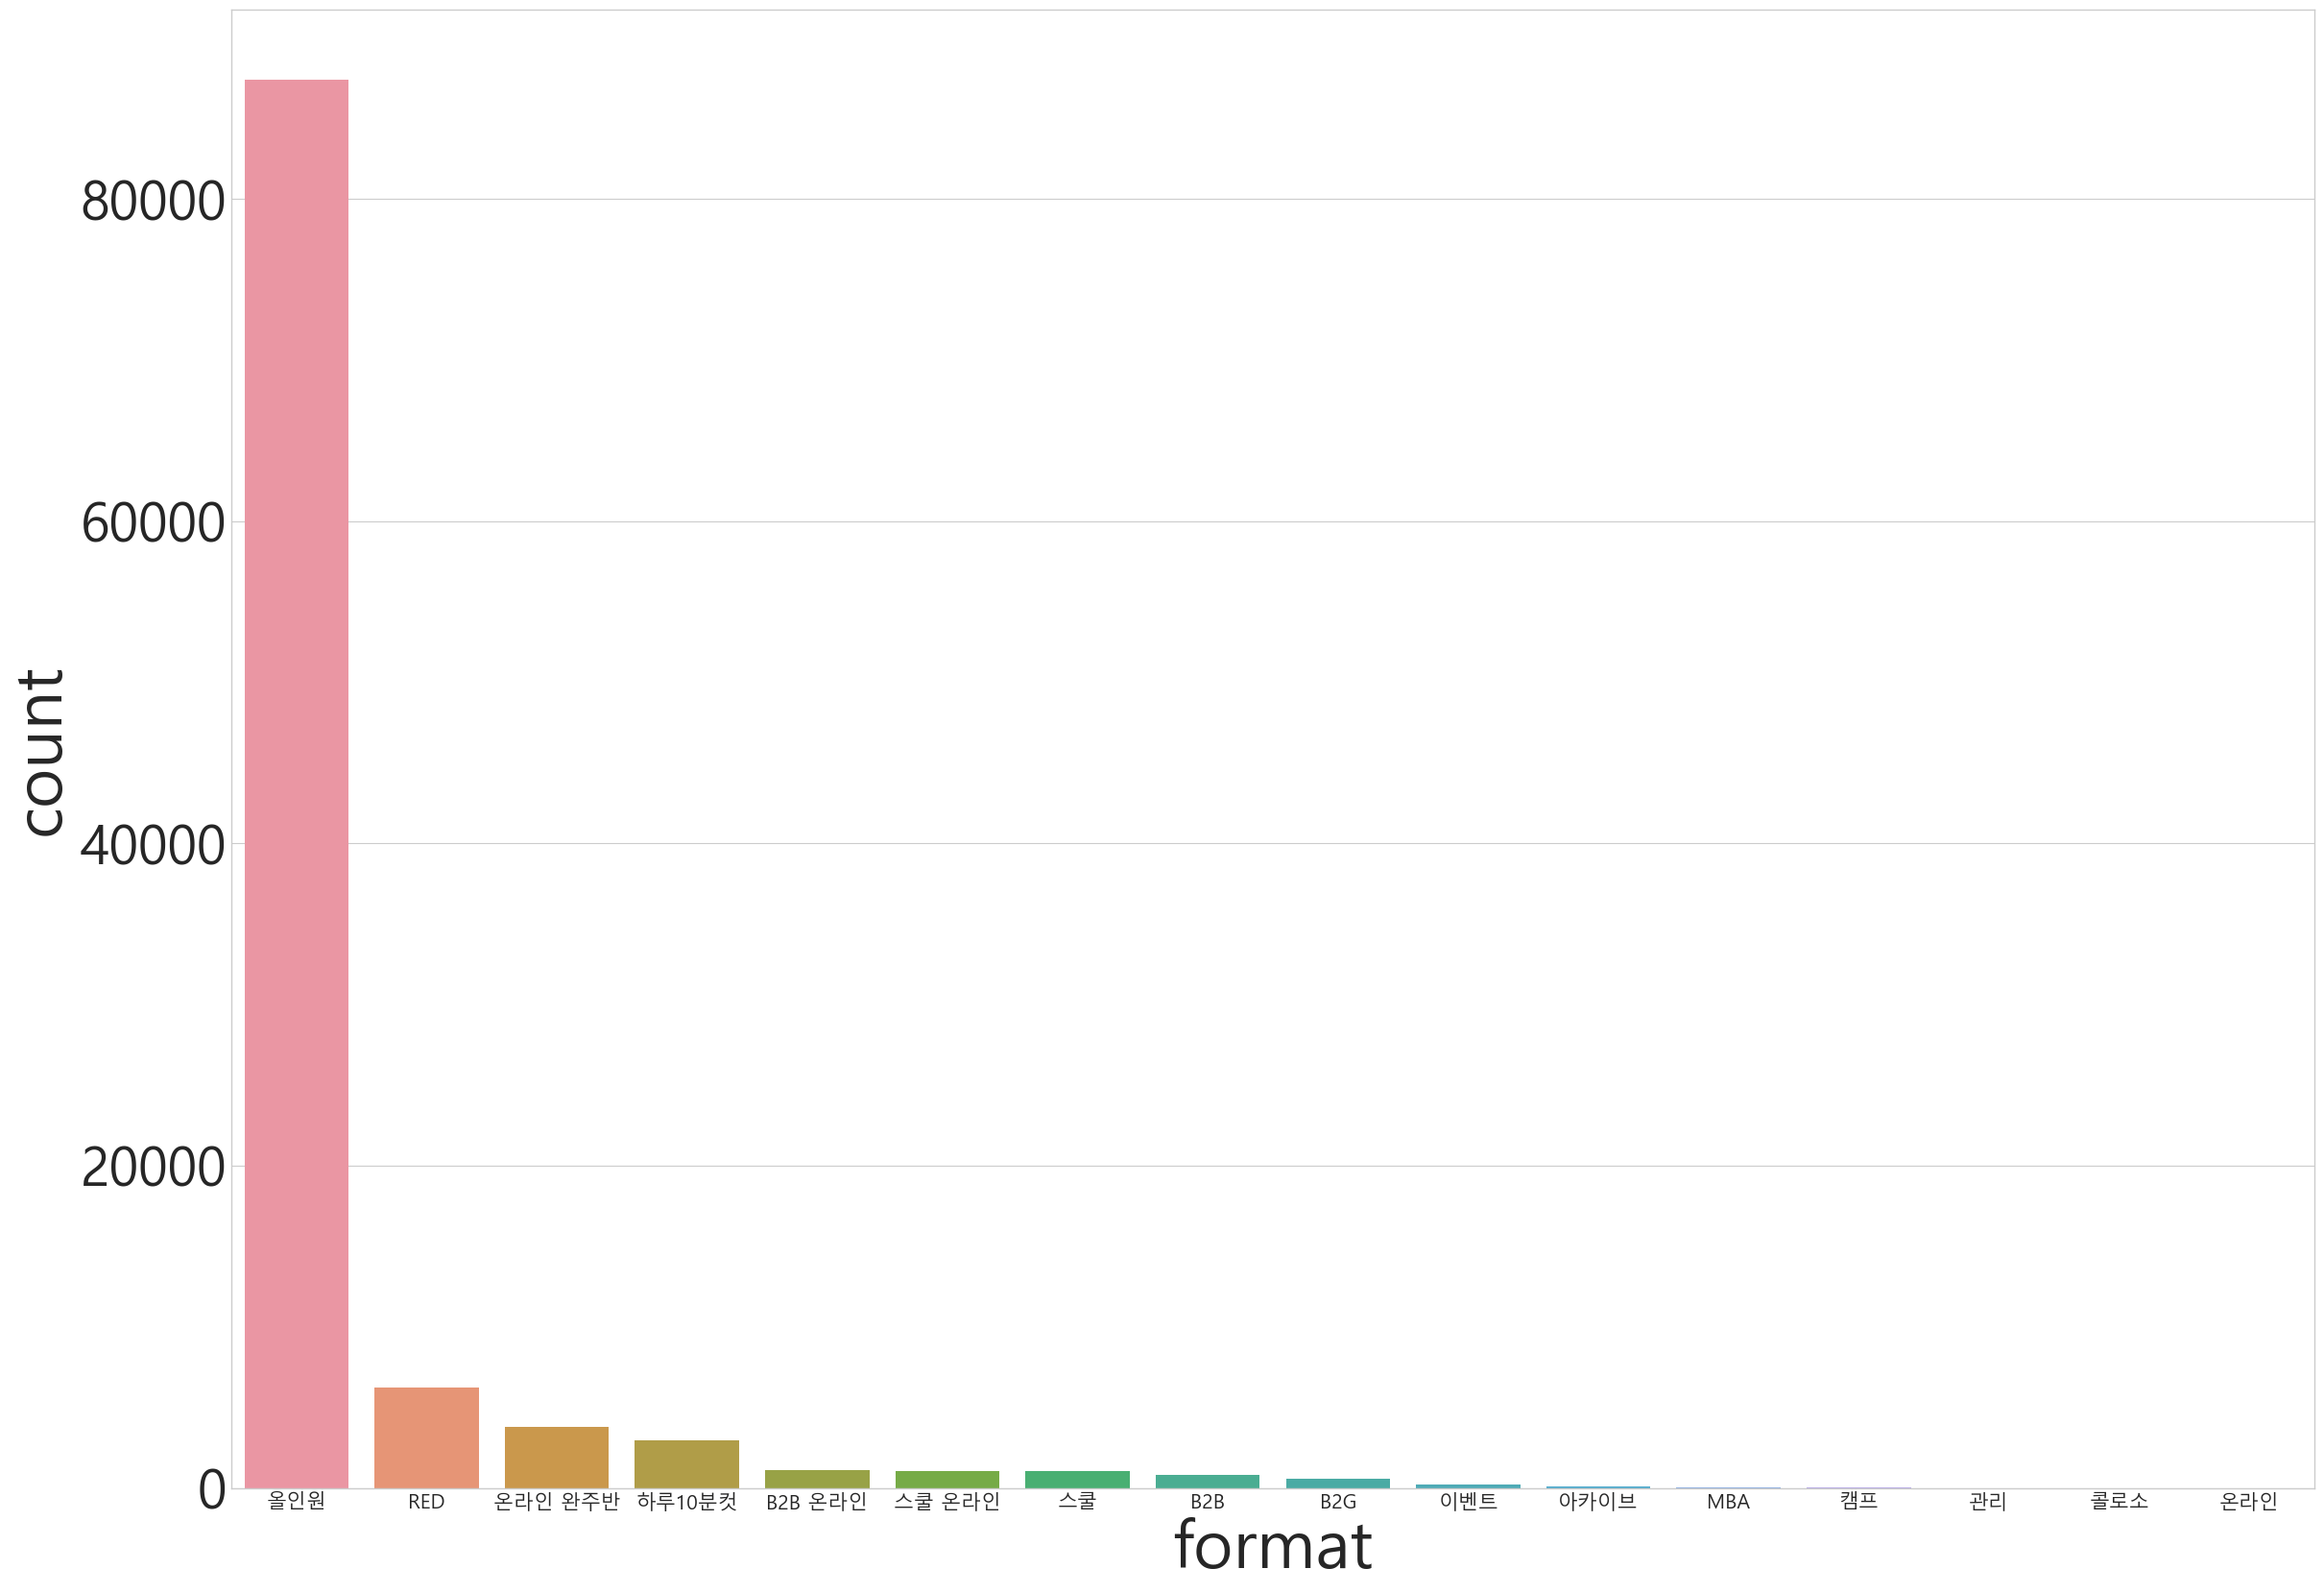

올인원        87402
RED         6253
온라인 완주반     3817
하루10분컷      2978
B2B 온라인     1086
스쿨 온라인      1057
스쿨          1036
B2B          808
B2G          592
이벤트          193
아카이브          72
MBA           56
캠프            48
관리             2
콜로소            2
온라인            1
Name: format, dtype: int64


<Figure size 640x480 with 0 Axes>

In [82]:
plt.figure(figsize=(28,20))
sns.countplot(x='format', data=fastcampus_copy, order = fastcampus['format'].value_counts().index)
plt.show()
plt.tight_layout()
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=40)
print(fastcampus_copy['format'].value_counts())

## subcategory_title

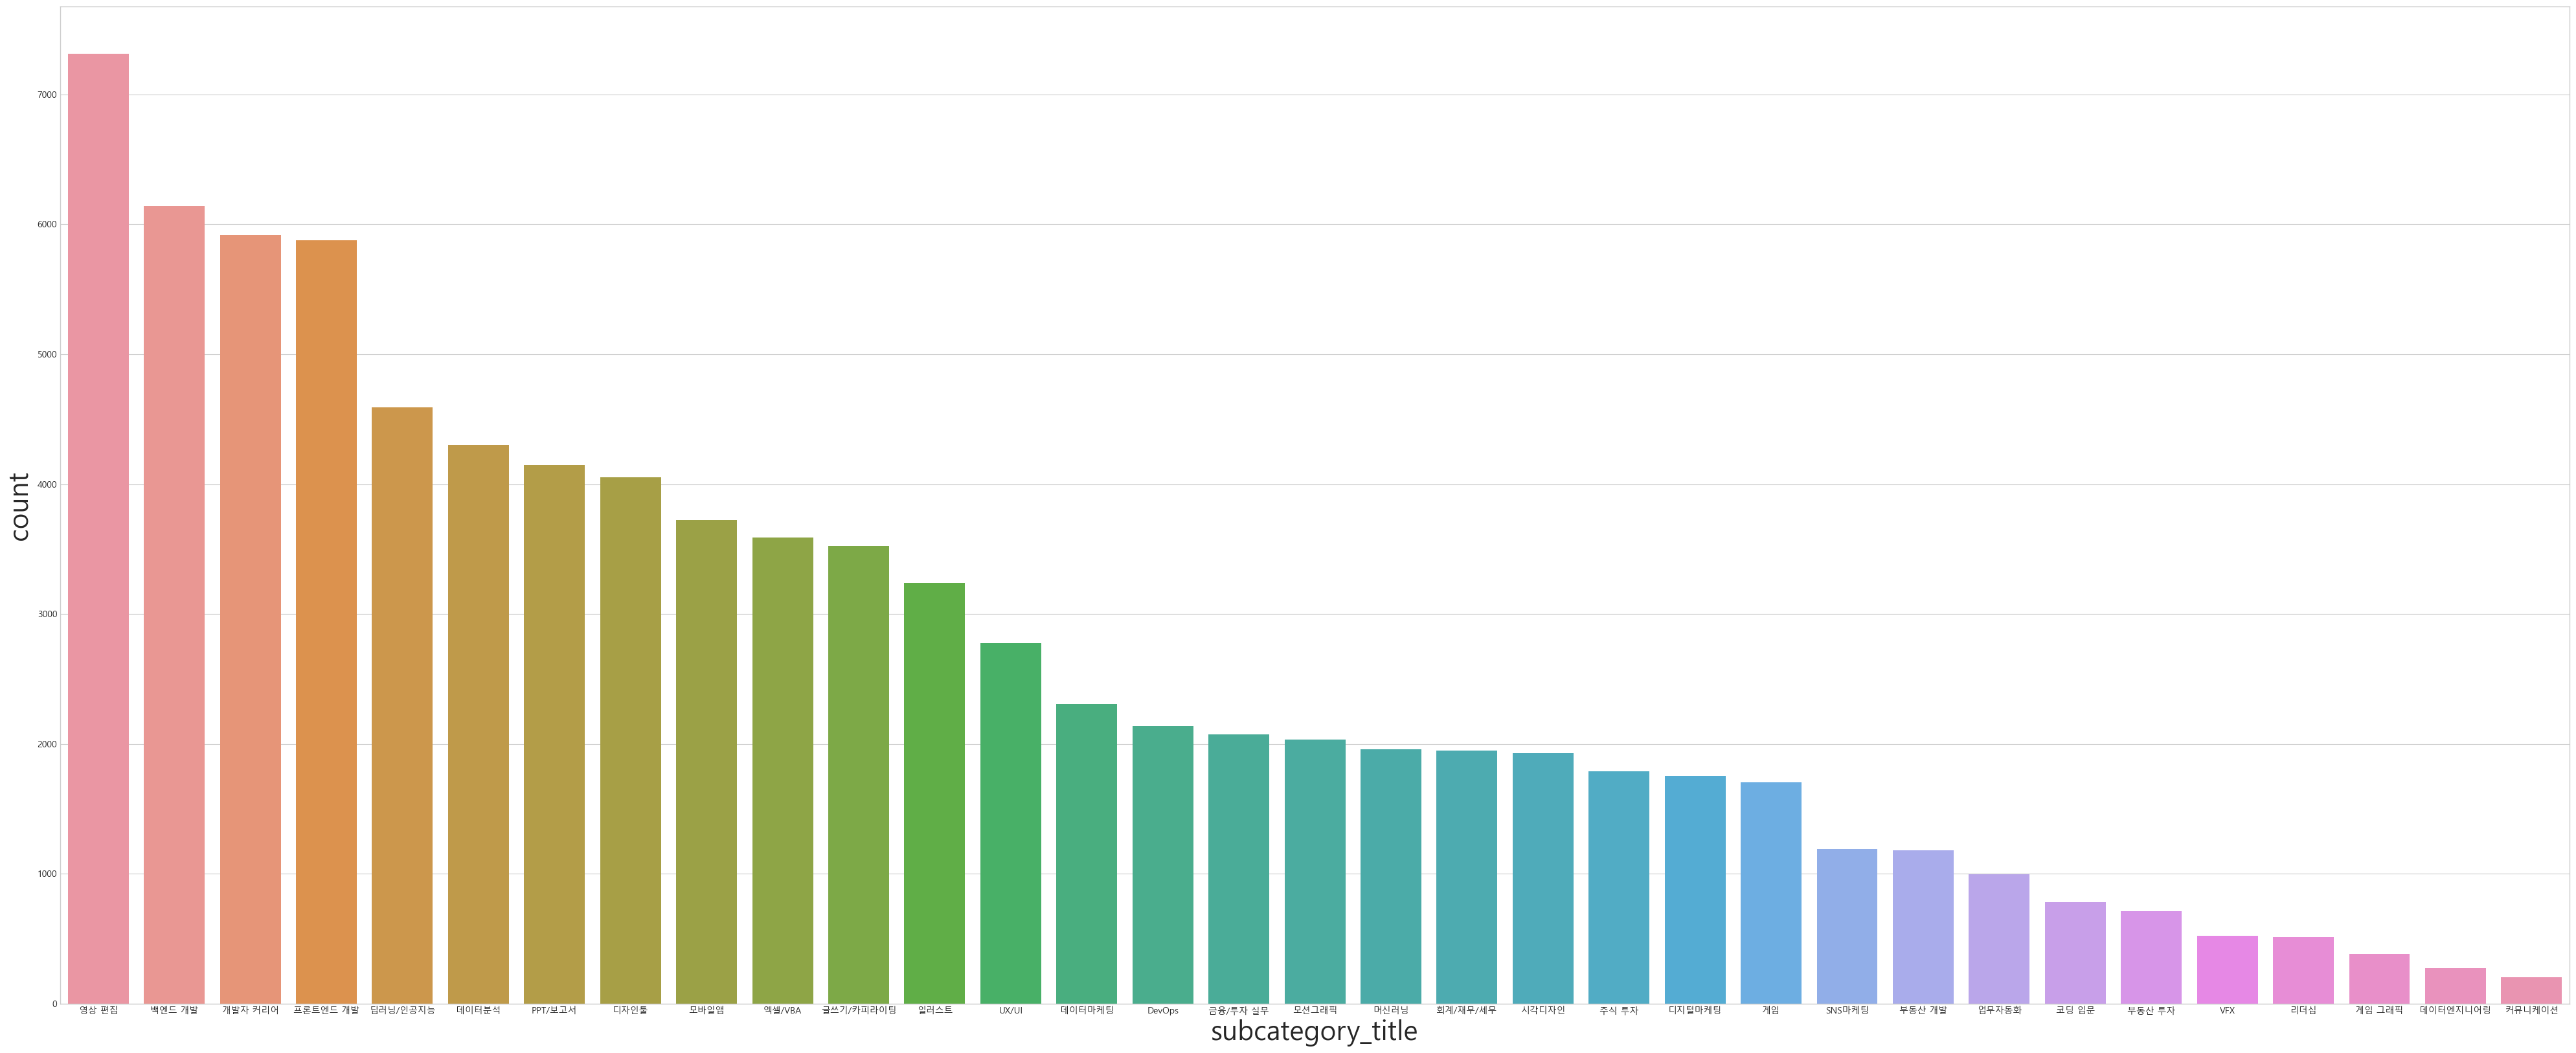

없음           19829
영상 편집         7312
백엔드 개발        6144
개발자 커리어       5918
프론트엔드 개발      5879
딥러닝/인공지능      4590
데이터분석         4302
PPT/보고서       4150
디자인툴          4053
모바일앱          3724
엑셀/VBA        3591
글쓰기/카피라이팅     3524
일러스트          3238
UX/UI         2775
데이터마케팅        2306
DevOps        2136
금융/투자 실무      2075
모션그래픽         2033
머신러닝          1958
회계/재무/세무      1948
시각디자인         1927
주식 투자         1787
디지털마케팅        1754
게임            1707
SNS마케팅        1190
부동산 개발        1179
업무자동화          996
코딩 입문          782
부동산 투자         714
VFX            523
리더십            511
게임 그래픽         385
데이터엔지니어링       275
커뮤니케이션         204
Name: subcategory_title, dtype: int64


<Figure size 640x480 with 0 Axes>

In [27]:
plt.figure(figsize=(50,20))
sns.countplot(x='subcategory_title', data=fastcampus_copy, order = fastcampus['subcategory_title'].value_counts().index)
plt.show()
plt.tight_layout()
plt.rc('axes', labelsize=30)
print(fastcampus_copy['subcategory_title'].value_counts())                       

## 숫자형 변수 분석

## customer_id

In [16]:
fastcampus['customer_id'].value_counts().sort_index()

16.0        1
46.0        2
47.0        3
79.0        1
96.0        1
           ..
670891.0    1
670896.0    2
672301.0    1
672307.0    1
672308.0    1
Name: customer_id, Length: 53753, dtype: int64

## transaction_amount

In [110]:
fastcampus_copy['transaction_amount'].value_counts().sort_index()

-4144074.0       1
-3193827.0       1
-2512593.0       1
-1983330.0       1
-1800000.0      11
                ..
 50665980.0      1
 58100000.0      1
 81040000.0      1
 90940000.0      1
 113400000.0     1
Name: transaction_amount, Length: 2393, dtype: int64

## coupon_discount_amount

In [28]:
fastcampus_copy['coupon_discount_amount'].value_counts().sort_index()     

0.0          73603
495.0            6
500.0            1
975.0            1
995.0            1
             ...  
674000.0         1
700000.0         1
800000.0         2
1000000.0        1
2000000.0        1
Name: coupon_discount_amount, Length: 773, dtype: int64

## sale_price

In [12]:
fastcampus_copy['sale_price'].value_counts()

299000.0      2454
149000.0      2219
99000.0       2178
119000.0      2051
159000.0      2023
              ... 
859290.0         1
6900000.0        1
365000.0         1
137400.0         1
90940000.0       1
Name: sale_price, Length: 550, dtype: int64

## marketing_start_at

In [29]:
fastcampus_copy['marketing_start_at'].value_counts().sort_index()

2018-12-07      1
2019-02-19    388
2019-02-20    237
2019-03-22     59
2019-04-04    298
             ... 
2021-08-30    298
2021-09-06    277
2021-09-10      2
2021-09-13    493
2021-09-16      1
Name: marketing_start_at, Length: 179, dtype: int64

# 결론 : 프로그래밍 관련의 양이 많다. 그 이유를 찾아보자

# 상관관계 분석   데이터가 많으니깐 표본을 뽑아야 되는데 기준은????????

## category_title vs state

In [50]:
fastcampus_copy.groupby(['category_title', 'state']).count()

id  customer_id   type  course_title  format  \
category_title state                                                        
관리             CANCELLED      1            1      1             1       1   
               COMPLETED      1            1      1             1       1   
교육             CANCELLED     71           71     71            71      71   
               COMPLETED    934          934    934           934     934   
               DELETED       26           26     26            26      26   
데이터 사이언스       CANCELLED      4            4      4             4       4   
               COMPLETED      5            5      5             5       5   
데이터사이언스        CANCELLED   5713         5713   5713          5713    5713   
               COMPLETED   8193         8193   8193          8193    8193   
               DELETED       21           21     21            21      21   
               PENDING      147          147    147           147     147   
               REQUESTED      2            2      2             2       2   
디자인            CANCELLED   4885         4885   4885          4885    4885   
               COMPLETED   6942         6942   6942          6942    6942   
               DELETED       20           20     20            20      20   
               PENDING      162          162    162           162     162   
마케팅            CANCELLED   3724         3724   3724          3724    3724   
               COMPLETED   5956         5956   5956          5956    5956   
               DELETED       27           27     27            27      27   
               PENDING      149          149    149           149     149   
               REQUESTED      1            1      1             1       1   
부동산/금융         CANCELLED   2146         2146   2146          2146    2146   
               COMPLETED   3312         3312   3312          3312    3312   
               DELETED        7            7      7             7       7   
               PENDING       57           57     57            57      57   
               REQUESTED      1            1      1             1       1   
비즈니스           CANCELLED     18           18     18            18      18   
               COMPLETED     24           24     24            24      24   
업무 생산성         CANCELLED   5620         5620   5620          5620    5620   
               COMPLETED   7500         7500   7500          7500    7500   
               DELETED       26           26     26            26      26   
               PENDING      175          175    175           175     175   
               REQUESTED      2            2      2             2       2   
영상/3D          CANCELLED   4008         4008   4008          4008    4008   
               COMPLETED   6100         6100   6100          6100    6100   
               DELETED       26           26     26            26      26   
               PENDING      123          123    123           123     123   
               REQUESTED      3            3      3             3       3   
일러스트           CANCELLED      1            1      1             1       1   
지식콘텐츠          CANCELLED     20           20     20            20      20   
               COMPLETED     33           33     33            33      33   
               PENDING        3            3      3             3       3   
크리에이티브         CANCELLED   1162         1162   1162          1162    1162   
               COMPLETED   1044         1044   1044          1044    1044   
               DELETED        7            7      7             7       7   
               PENDING       36           36     36            36      36   
               REQUESTED      1            1      1             1       1   
투자/재테크         CANCELLED    732          732    732           732     732   
               COMPLETED   1735         1735   1735          1735    1735   
               DELETED        4            4      4             4       4   
               PENDING   

In [111]:
fastcampus_copy.groupby(['category_title', 'state']).agg({'transaction_amount':['count', 'mean']})

transaction_amount              
                                      count          mean
category_title state                                     
관리             CANCELLED                  1  1.500000e+05
               COMPLETED                  1  1.500000e+05
교육             CANCELLED                 71  1.353620e+06
               COMPLETED                934  1.242800e+06
               DELETED                   26  7.635577e+05
데이터 사이언스       CANCELLED                  4  3.890000e+05
               COMPLETED                  5  3.100000e+05
데이터사이언스        CANCELLED               5713  1.937884e+05
               COMPLETED               8193  2.026521e+05
               DELETED                   21  1.924143e+05
               PENDING                  147  1.795901e+05
               REQUESTED                  2  2.280000e+05
디자인            CANCELLED               4885  1.365653e+05
               COMPLETED               6942  1.120607e+05
               DELETED                   20  1.498600e+05
               PENDING                  162  1.482590e+05
마케팅            CANCELLED               3724  1.604011e+05
               COMPLETED               5956  1.457867e+05
               DELETED                   27  1.339926e+05
               PENDING                  149  1.646292e+05
               REQUESTED                  1  4.712000e+05
부동산/금융         CANCELLED               2146  1.850008e+05
               COMPLETED               3312  1.625313e+05
               DELETED                    7  1.997143e+05
               PENDING                   57  1.732596e+05
               REQUESTED                  1  1.010000e+05
비즈니스           CANCELLED                 18  3.402419e+05
               COMPLETED                 24  2.245777e+05
업무 생산성         CANCELLED               5620  9.327464e+04
               COMPLETED               7500  8.852279e+04
               DELETED                   26  1.071500e+05
               PENDING                  175  1.105032e+05
               REQUESTED                  2  1.032500e+05
영상/3D          CANCELLED               4008  1.157294e+05
               COMPLETED               6100  1.010013e+05
               DELETED                   26  1.237923e+05
               PENDING                  123  1.174959e+05
               REQUESTED                  3  8.983333e+04
일러스트           CANCELLED                  1  2.080000e+05
지식콘텐츠          CANCELLED                 20  2.355000e+05
               COMPLETED                 33  2.230303e+05
               PENDING                    3  2.356667e+05
크리에이티브         CANCELLED               1162  4.066096e+05
               COMPLETED               1044  3.270506e+05
               DELETED                    7  5.767143e+05
               PENDING                   36  3.329528e+05
               REQUESTED                  1  1.990000e+05
투자/재테크         CANCELLED                732  2.114459e+05
               COMPLETED               1735  1.826449e+05
               DELETED                    4  2.942500e+05
               PENDING                   30  2.256833e+05
파이낸스           CANCELLED                  6  3.300000e+05
               COMPLETED                 19  2.684211e+05
프로그래밍          CANCELLED              13164  1.334906e+05
               COMPLETED              20957  9.393888e+04
               DELETED                   43  1.799163e+05
               PENDING                  262  1.597896e+05
               REQUESTED                  4  9.262500e+04

### 프로그래밍은 강의값도 싸지만 강의수도 다양했나????????

In [35]:
fastcampus_copy.groupby(['category_title', 'coupon_title']).count()

id  \
category_title coupon_title                                               
관리             없음                                                     2   
교육             없음                                                  1031   
데이터 사이언스       없음                                                     9   
데이터사이언스        4월 1+1 페이백 이벤트 쿠폰                                    304   
               5월 5일 어른이날 기념 5%쿠폰                                     1   
...                                                                 ...   
프로그래밍          패캐머_온라인 쿠폰! (CRM팀)                                     3   
               프론트엔드(React)기수강생 설문지 할인 쿠폰                             8   
               한 번에 끝내는 Java/Sring 웹 개발 마스터 초격차 패키지 무료 쿠폰             1   
               한 번에 끝내는 Java/Sring 웹 개발 마스터 초격차 패키지 무료 쿠폰 (-2/28)   346   
               호준 테스트                                                 1   

                                                                   customer_id  \
category_title coupon_title                                                      
관리             없음                                                            2   
교육             없음                                                         1031   
데이터 사이언스       없음                                                            9   
데이터사이언스        4월 1+1 페이백 이벤트 쿠폰                                           304   
               5월 5일 어른이날 기념 5%쿠폰                                            1   
...                                                                        ...   
프로그래밍          패캐머_온라인 쿠폰! (CRM팀)                                            3   
               프론트엔드(React)기수강생 설문지 할인 쿠폰                                    8   
               한 번에 끝내는 Java/Sring 웹 개발 마스터 초격차 패키지 무료 쿠폰                    1   
               한 번에 끝내는 Java/Sring 웹 개발 마스터 초격차 패키지 무료 쿠폰 (-2/28)          346   
               호준 테스트                                                        1   

                                                                   type  \
category_title coupon_title                                               
관리             없음                                                     2   
교육             없음                                                  1031   
데이터 사이언스       없음                                                     9   
데이터사이언스        4월 1+1 페이백 이벤트 쿠폰                                    304   
               5월 5일 어른이날 기념 5%쿠폰                                     1   
...                                                                 ...   
프로그래밍          패캐머_온라인 쿠폰! (CRM팀)                                     3   
               프론트엔드(React)기수강생 설문지 할인 쿠폰                             8   
               한 번에 끝내는 Java/Sring 웹 개발 마스터 초격차 패키지 무료 쿠폰             1   
               한 번에 끝내는 Java/Sring 웹 개발 마스터 초격차 패키지 무료 쿠폰 (-2/28)   346   
               호준 테스트                                                 1   

                                                                   state  \
category_title coupon_title                                                
관리             없음                                                      2   
교육             없음                                                   1031   
데이터 사이언스       없음                                                      9   
데이터사이언스        4월 1+1 페이백 이벤트 쿠폰                                     304   
               5월 5일 어른이날 기념 5%쿠폰                                      1   
...                                                                  ...   
프로그래밍          패캐머_온라인 쿠폰! (CRM팀)                                      3   
               프론트엔드(React)기수강생 설문지 할인 쿠폰                              8   
               한 번에 끝내는 Java/Sring 웹 개발 마스터 초격차 패키지 무료 쿠폰              1   
               한 번에 끝내는 Java/Sring 웹 개발 마스터 초격차 패키지 무료 쿠폰 (-2/28)    346   
               호준 테스트                                                  1   

                                                             

In [112]:
fastcampus_copy.groupby(['category_title', 'transaction_amount']).count()

id  customer_id  type  state  course_title  \
category_title transaction_amount                                               
관리              150000.0            2            2     2      2             2   
교육             -1500000.0           1            1     1      1             1   
               -600000.0            1            1     1      1             1   
               -480000.0            1            1     1      1             1   
               -240000.0            1            1     1      1             1   
...                                ..          ...   ...    ...           ...   
프로그래밍           2398000.0           1            1     1      1             1   
                3200000.0           1            1     1      1             1   
                4320000.0           1            1     1      1             1   
                15900000.0          1            1     1      1             1   
                19503000.0          1            1     1      1             1   

                                   format  completed_at  coupon_title  \
category_title transaction_amount                                       
관리              150000.0                2             2             2   
교육             -1500000.0               1             1             1   
               -600000.0                1             1             1   
               -480000.0                1             1             1   
               -240000.0                1             1             1   
...                                   ...           ...           ...   
프로그래밍           2398000.0               1             1             1   
                3200000.0               1             1             1   
                4320000.0               1             1             1   
                15900000.0              1             1             1   
                19503000.0              1             1             1   

                                   coupon_discount_amount  sale_price  \
category_title transaction_amount                                       
관리              150000.0                                2           2   
교육             -1500000.0                               1           0   
               -600000.0                                1           0   
               -480000.0                                1           0   
               -240000.0                                1           1   
...                                                   ...         ...   
프로그래밍           2398000.0                               1           0   
                3200000.0                               1           0   
                4320000.0                               1           0   
                15900000.0                              1           1   
                19503000.0                              1           0   

                                   subcategory_title  marketing_start_at  
category_title transaction_amount                                         
관리              150000.0                           2                   0  
교육             -1500000.0                          1                   0  
               -600000.0                           1                   0  
               -480000.0                           1                   0  
               -240000.0                           1                   0  
...                                              ...                 ...  
프로그래밍           2398000.0                          1                   0  
                3200000.0                          1                   0  
                4320000.0                          1                   0  
                15900000.0                         1                   0  
                19503000.0                         1                   0  

[5003 rows x 12 columns]

In [37]:
fastcampus_copy.groupby(['category_title', 'marketing_start_at']).count()

id  customer_id  type  state  \
category_title marketing_start_at                                  
교육             2021-06-11            1            1     1      1   
데이터 사이언스       2021-01-04            1            1     1      1   
               2021-05-21            8            8     8      8   
데이터사이언스        2019-04-04          298          298   298    298   
               2019-05-17          669          669   669    669   
...                                ...          ...   ...    ...   
프로그래밍          2021-08-09          242          242   242    242   
               2021-08-23          100          100   100    100   
               2021-08-30           65           65    65     65   
               2021-09-10            2            2     2      2   
               2021-09-13          199          199   199    199   

                                   course_title  format  completed_at  \
category_title marketing_start_at                                       
교육             2021-06-11                     1       1             1   
데이터 사이언스       2021-01-04                     1       1             1   
               2021-05-21                     8       8             8   
데이터사이언스        2019-04-04                   298     298           298   
               2019-05-17                   669     669           669   
...                                         ...     ...           ...   
프로그래밍          2021-08-09                   242     242           242   
               2021-08-23                   100     100           100   
               2021-08-30                    65      65            65   
               2021-09-10                     2       2             2   
               2021-09-13                   199     199           199   

                                   transaction_amount  coupon_title  \
category_title marketing_start_at                                     
교육             2021-06-11                           1             1   
데이터 사이언스       2021-01-04                           1             1   
               2021-05-21                           8             8   
데이터사이언스        2019-04-04                         298           298   
               2019-05-17                         669           669   
...                                               ...           ...   
프로그래밍          2021-08-09                         242           242   
               2021-08-23                         100           100   
               2021-08-30                          65            65   
               2021-09-10                           2             2   
               2021-09-13                         199           199   

                                   coupon_discount_amount  sale_price  \
category_title marketing_start_at                                       
교육             2021-06-11                               1           0   
데이터 사이언스       2021-01-04                               1           1   
               2021-05-21                               8           8   
데이터사이언스        2019-04-04                             298         297   
               2019-05-17                             669         669   
...                                                   ...         ...   
프로그래밍          2021-08-09                             242         242   
               2021-08-23                             100         100   
               2021-08-30                              65          65   
               2021-09-10                               2           2   
               2021-09-13                             199         199   

                                   subcategory_title  
category_title marketing_start_at                     
교육             2021-06-11                          1  
데이터 사이언스       2021-01-04                          1  
               2021-05-21                          8  
데이터사이언스        2019-04-04                        298

In [65]:
category = fastcampus_copy.groupby(['marketing_start_at','category_title']).agg({'transaction_amount':'count', 
                                                                                  'completed_at':'count',
                                                                                   'format': 'count'}).reset_index()
category

,marketing_start_at,category_title,transaction_amount,completed_at,format
0,2018-12-07,프로그래밍,1,1,1
1,2019-02-19,영상/3D,387,387,387
2,2019-02-19,크리에이티브,1,1,1
3,2019-02-20,부동산/금융,237,237,237
4,2019-03-22,업무 생산성,59,59,59
...,...,...,...,...,...
237,2021-09-13,디자인,50,50,50
238,2021-09-13,부동산/금융,57,57,57
239,2021-09-13,영상/3D,79,79,79
240,2021-09-13,프로그래밍,199,199,199


In [70]:
category2 = fastcampus_copy.groupby(['completed_at','category_title']).agg({'transaction_amount':'count', 
                                                                                  'format': 'count'}).reset_index()
category2

,completed_at,category_title,transaction_amount,format
0,2021-03-28 15:00:11,프로그래밍,1,1
1,2021-03-28 15:16:53,영상/3D,1,1
2,2021-03-28 15:21:43,프로그래밍,2,2
3,2021-03-28 15:21:54,업무 생산성,1,1
4,2021-03-28 15:21:56,업무 생산성,1,1
...,...,...,...,...
99197,2021-09-25 14:10:42,영상/3D,1,1
99198,2021-09-25 14:16:33,부동산/금융,1,1
99199,2021-09-25 14:17:41,영상/3D,1,1
99200,2021-09-25 14:19:56,부동산/금융,1,1


In [75]:
category2["completed_at_ym"] = ''

category2

,completed_at,category_title,transaction_amount,format,completed_at_ym
0,2021-03-28 15:00:11,프로그래밍,1,1,
1,2021-03-28 15:16:53,영상/3D,1,1,
2,2021-03-28 15:21:43,프로그래밍,2,2,
3,2021-03-28 15:21:54,업무 생산성,1,1,
4,2021-03-28 15:21:56,업무 생산성,1,1,
...,...,...,...,...,...
99197,2021-09-25 14:10:42,영상/3D,1,1,
99198,2021-09-25 14:16:33,부동산/금융,1,1,
99199,2021-09-25 14:17:41,영상/3D,1,1,
99200,2021-09-25 14:19:56,부동산/금융,1,1,


In [77]:
category2

,completed_at,category_title,transaction_amount,format,completed_at_ym
0,2021-03-28 15:00:11,프로그래밍,1,1,2021-03
1,2021-03-28 15:16:53,영상/3D,1,1,2021-03
2,2021-03-28 15:21:43,프로그래밍,2,2,2021-03
3,2021-03-28 15:21:54,업무 생산성,1,1,2021-03
4,2021-03-28 15:21:56,업무 생산성,1,1,2021-03
...,...,...,...,...,...
99197,2021-09-25 14:10:42,영상/3D,1,1,2021-09
99198,2021-09-25 14:16:33,부동산/금융,1,1,2021-09
99199,2021-09-25 14:17:41,영상/3D,1,1,2021-09
99200,2021-09-25 14:19:56,부동산/금융,1,1,2021-09


In [76]:
category2['completed_at_ym'] = category2["completed_at"].dt.strftime("%Y-%m")
category2['completed_at_ym']

0        2021-03
1        2021-03
2        2021-03
3        2021-03
4        2021-03
          ...   
99197    2021-09
99198    2021-09
99199    2021-09
99200    2021-09
99201    2021-09
Name: completed_at_ym, Length: 99202, dtype: object

In [91]:
category2_pivot = category2.pivot_table(index='completed_at_ym', columns='category_title', values="transaction_amount", aggfunc="sum")
category2_pivot

category_title,관리,교육,데이터 사이언스,데이터사이언스,디자인,마케팅,부동산/금융,비즈니스,업무 생산성,영상/3D,일러스트,지식콘텐츠,크리에이티브,투자/재테크,파이낸스,프로그래밍
completed_at_ym,,,,,,,,,,,,,,,,
2021-03,NaN,46.0,NaN,755.0,561.0,451.0,308.0,NaN,669.0,490.0,NaN,NaN,67.0,40.0,NaN,1585.0
2021-04,NaN,222.0,NaN,3386.0,1900.0,1950.0,1042.0,NaN,2293.0,1921.0,NaN,NaN,566.0,207.0,NaN,7037.0
2021-05,2.0,117.0,NaN,2353.0,1969.0,1630.0,1041.0,NaN,4159.0,1520.0,NaN,NaN,649.0,197.0,NaN,7454.0
2021-06,NaN,164.0,8.0,2864.0,2546.0,2436.0,1098.0,11.0,2278.0,2111.0,NaN,45.0,478.0,330.0,NaN,6092.0
2021-07,NaN,190.0,NaN,2203.0,1994.0,1716.0,702.0,1.0,1889.0,1574.0,1.0,10.0,261.0,551.0,1.0,5000.0
2021-08,NaN,158.0,1.0,1375.0,1936.0,1080.0,792.0,19.0,1320.0,1617.0,NaN,NaN,75.0,830.0,11.0,4541.0
2021-09,NaN,134.0,NaN,1140.0,1103.0,594.0,540.0,11.0,715.0,1027.0,NaN,1.0,154.0,346.0,13.0,2721.0


In [123]:
category2_pivot

category_title,관리,교육,데이터 사이언스,데이터사이언스,디자인,마케팅,부동산/금융,비즈니스,업무 생산성,영상/3D,일러스트,지식콘텐츠,크리에이티브,투자/재테크,파이낸스,프로그래밍
completed_at_ym,,,,,,,,,,,,,,,,
2021-03,NaN,46.0,NaN,755.0,561.0,451.0,308.0,NaN,669.0,490.0,NaN,NaN,67.0,40.0,NaN,1585.0
2021-04,NaN,222.0,NaN,3386.0,1900.0,1950.0,1042.0,NaN,2293.0,1921.0,NaN,NaN,566.0,207.0,NaN,7037.0
2021-05,2.0,117.0,NaN,2353.0,1969.0,1630.0,1041.0,NaN,4159.0,1520.0,NaN,NaN,649.0,197.0,NaN,7454.0
2021-06,NaN,164.0,8.0,2864.0,2546.0,2436.0,1098.0,11.0,2278.0,2111.0,NaN,45.0,478.0,330.0,NaN,6092.0
2021-07,NaN,190.0,NaN,2203.0,1994.0,1716.0,702.0,1.0,1889.0,1574.0,1.0,10.0,261.0,551.0,1.0,5000.0
2021-08,NaN,158.0,1.0,1375.0,1936.0,1080.0,792.0,19.0,1320.0,1617.0,NaN,NaN,75.0,830.0,11.0,4541.0
2021-09,NaN,134.0,NaN,1140.0,1103.0,594.0,540.0,11.0,715.0,1027.0,NaN,1.0,154.0,346.0,13.0,2721.0


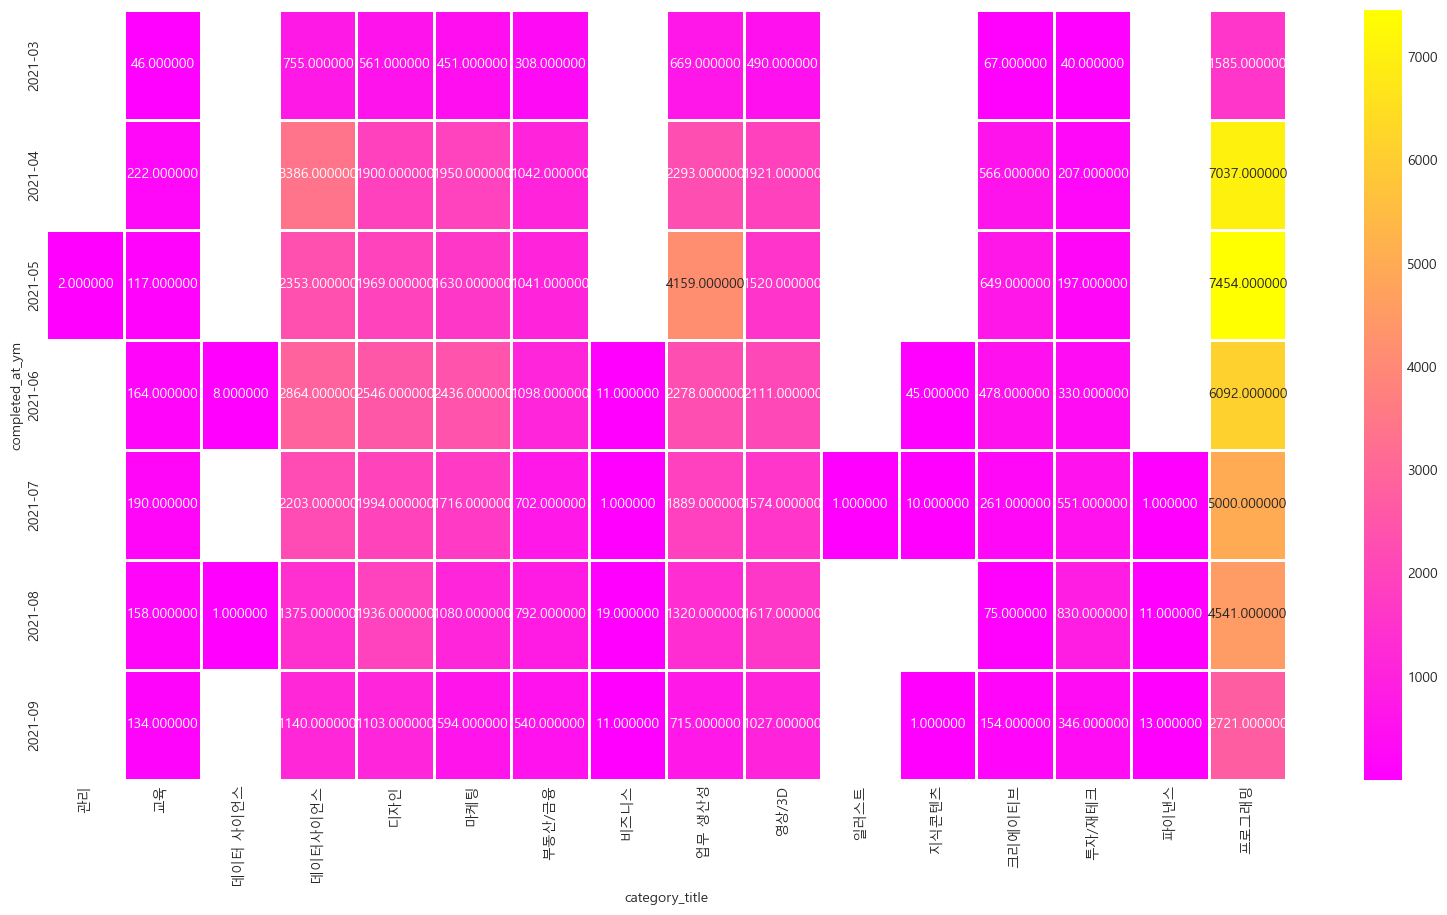

In [122]:
# heatmap
plt.figure(figsize=(20,10))
ax = sns.heatmap(category2_pivot, annot=True, fmt='f', linewidths = 1, cmap="spring")
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic')

# 마지막으로 마케팅 날짜와 판매완료된 날짜 그리고 강의와 연관을 분석해야한다.
# 생각해볼수 있는게 올인원, 쿠폰, 가격할인 홍보?
# 히트맵에서 숫자처리 어떻게 해야 하나?

# 프로그래밍의 판매완료된 날짜에 대한 선 그래프 그리기

<AxesSubplot:xlabel='completed_at_ym', ylabel='프로그래밍'>

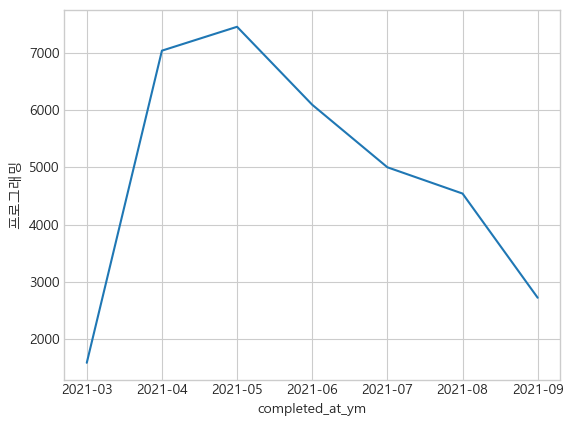

In [131]:
sns.lineplot(data=category2_pivot, x = 'completed_at_ym', y = "프로그래밍")

<AxesSubplot:xlabel='completed_at_ym', ylabel='데이터사이언스'>

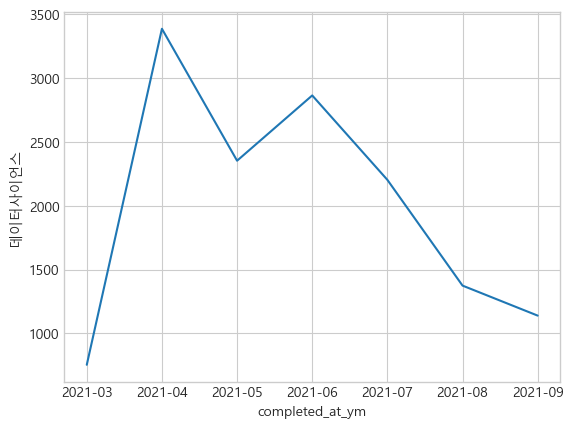

In [132]:
sns.lineplot(data=category2_pivot, x = 'completed_at_ym', y = "데이터사이언스")

<AxesSubplot:xlabel='completed_at_ym', ylabel='업무 생산성'>

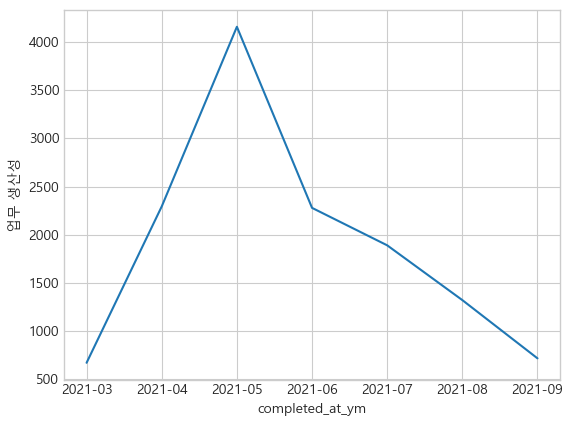

In [133]:
sns.lineplot(data=category2_pivot, x = 'completed_at_ym', y = "업무 생산성")